In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Load dataset
dataset = pd.read_csv('lstm_so2.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')

In [10]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [11]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [12]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [6]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [7]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1039/1039 - 4s - loss: 0.0011 - 4s/epoch - 3ms/step
Epoch 2/100
1039/1039 - 2s - loss: 7.3128e-05 - 2s/epoch - 2ms/step
Epoch 3/100
1039/1039 - 2s - loss: 5.2269e-05 - 2s/epoch - 2ms/step
Epoch 4/100
1039/1039 - 2s - loss: 4.9937e-05 - 2s/epoch - 2ms/step
Epoch 5/100
1039/1039 - 1s - loss: 1.0727e-04 - 1s/epoch - 1ms/step
Epoch 6/100
1039/1039 - 1s - loss: 3.0980e-05 - 1s/epoch - 1ms/step
Epoch 7/100
1039/1039 - 1s - loss: 9.0184e-05 - 1s/epoch - 1ms/step
Epoch 8/100
1039/1039 - 1s - loss: 5.5011e-05 - 1s/epoch - 1ms/step
Epoch 9/100
1039/1039 - 1s - loss: 1.1211e-04 - 1s/epoch - 1ms/step
Epoch 10/100
1039/1039 - 2s - loss: 3.7976e-05 - 2s/epoch - 1ms/step
Epoch 11/100
1039/1039 - 2s - loss: 3.4735e-05 - 2s/epoch - 2ms/step
Epoch 12/100
1039/1039 - 2s - loss: 5.5504e-05 - 2s/epoch - 2ms/step
Epoch 13/100
1039/1039 - 2s - loss: 4.3165e-05 - 2s/epoch - 1ms/step
Epoch 14/100
1039/1039 - 2s - loss: 4.6832e-05 - 2s/epoch - 2ms/step
Epoch 15/100
1039/1039 - 2s - loss: 5.9083e-05 

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [15]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)

In [16]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('R2 Score_train:', r2_score(train, train_predict))
print('R2 Score_test:', r2_score(test, test_predict))

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

R2 Score_train: 0.9969385985594673
R2 Score_test: 0.9904255292434048
Train RMSE: 1.64
Test RMSE: 1.60


In [17]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_SO2.xlsx')
df

,Actual,Predicted from lstm
0,[84.06999969482422],[86.03849029541016]
1,[83.4800033569336],[85.44090270996094]
2,[88.2300033569336],[90.2535171508789]
3,[80.16000366210938],[82.07937622070312]
4,[73.48999786376953],[75.3318099975586]
...,...,...
1034,[26.6200008392334],[28.182668685913086]
1035,[19.8700008392334],[21.437679290771484]
1036,[20.040000915527344],[21.607393264770508]
1037,[16.34000015258789],[17.91547966003418]


In [18]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lstm_SO2_test.xlsx')
df

,Actual,Predicted from lstm
0,[12.510000228881836],[14.09808349609375]
1,[11.390000343322754],[12.982603073120117]
2,[15.5600004196167],[17.137691497802734]
3,[20.90999984741211],[22.47606658935547]
4,[26.350000381469727],[27.912626266479492]
...,...,...
507,[1.2899999618530273],[2.940816879272461]
508,[1.600000023841858],[3.2485523223876953]
509,[1.4700000286102295],[3.119497537612915]
510,[1.0099999904632568],[2.662888765335083]


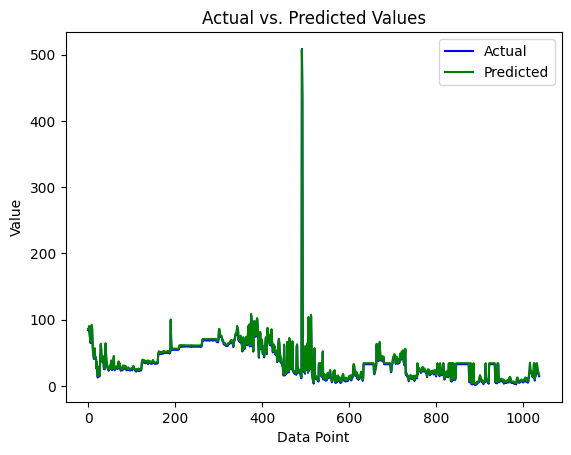

In [19]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

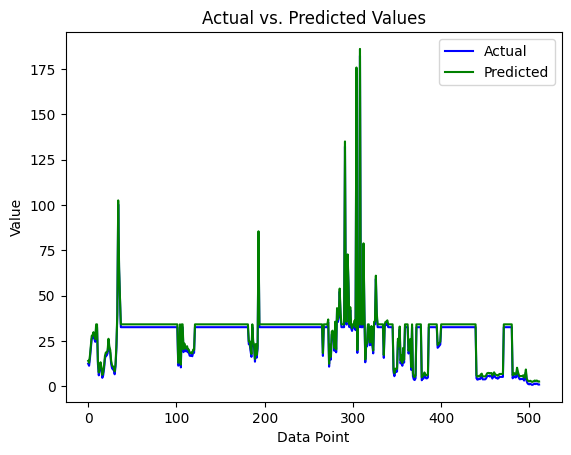

In [20]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()